# Part I - Ford GoBike System Data
## by Albatool Alsubaie

## Introduction


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [93]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [94]:
#loading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [95]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [96]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [97]:
#dropping null values
df = df.dropna()

In [98]:
#checking to make sure no null values left
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [99]:
df.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [100]:
#calculating members' ages
df.member_birth_year = 2022 - df.member_birth_year

In [101]:
df.rename(columns = {'member_birth_year':'member_age'}, inplace = True)

In [102]:
#changing duration counting from seconds to minutes
df.duration_sec = df.duration_sec.astype('int64') / 60

In [103]:
df.rename(columns = {'duration_sec':'duration_minutes'}, inplace = True)

In [104]:
df.duration_minutes = df.duration_minutes.astype('int64')

In [105]:
#loading clean dataset
df

,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip
0,869,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
2,1030,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50.0,Male,No
3,608,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33.0,Other,No
4,26,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48.0,Male,Yes
5,29,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,63.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,8,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,26.0,Male,No
183408,5,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,38.0,Male,No
183409,2,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,32.0,Male,Yes
183410,2,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,34.0,Male,No


### What is the structure of your dataset?

Dataset captures data of bike rides and bike ride users.

### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in bike riders' data.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the riders age and gender can have a factor on other decisions made by the riders.

## Univariate Exploration

I will start by demonstrating user type. Either a costumer or a subscriber.


Text(0.5, 1.0, 'User Type')

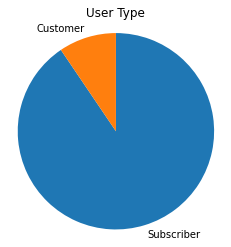

In [38]:
user_type = df['user_type'].value_counts()
plt.pie(user_type, labels = user_type.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title("User Type")

From this pie chart, we can see that the majority of users are subscribers.

Text(0.5, 1.0, 'User Gender')

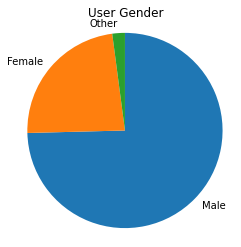

In [75]:
member_gender = df['member_gender'].value_counts()
plt.pie(member_gender, labels = member_gender.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title("User Gender")

From this pie chart, we can see that the majority of users are males.

Text(0.5, 1.0, 'Bike Share for All Trip')

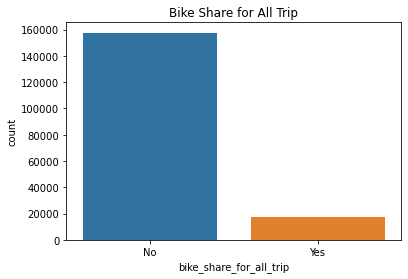

In [76]:
sb.countplot(data=df, x='bike_share_for_all_trip');
plt.title("Bike Share for All Trip")

From this chart, we can see that the majority of users do not share bikes for all trip

Text(0.5, 1.0, 'User Age')

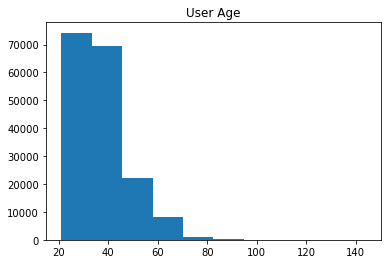

In [77]:
plt.hist(data = df, x = 'member_age')
plt.title("User Age")

From this plot, we see that the majority of users are in their early 20s

Text(0.5, 1.0, 'Bike Ride Duration In Minutes')

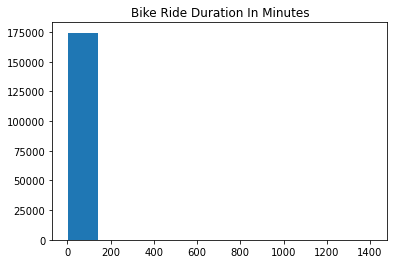

In [78]:
plt.hist(data = df, x = 'duration_minutes')
plt.title("Bike Ride Duration In Minutes")

In [39]:
df['duration_minutes'] = df['duration_minutes'].astype('int')

In [48]:
df.duration_minutes.value_counts()

5      15073
4      14675
6      14357
7      13578
8      12433
       ...  
874        1
721        1
370        1
621        1
214        1
Name: duration_minutes, Length: 426, dtype: int64

From this plot, we can see that the duration of bike rides mostly falls under 200 minutes with few exceptions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It was surprising to me that the duration of bike rides was majorly under 200 minutes, due to the fact that most users are subscribers and you would expect regular bikers to take the bikes for longer rides more often.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I wanted to make sure that all bike ride durations were under 200 minutes so I zoomed in the plot and noticed small bars exceeding 200. So I did a value count to make sure and it was correct.

## Bivariate Exploration


Text(0.5, 1.0, 'Bike Share for All Trip for Each Gender of Bike Users')

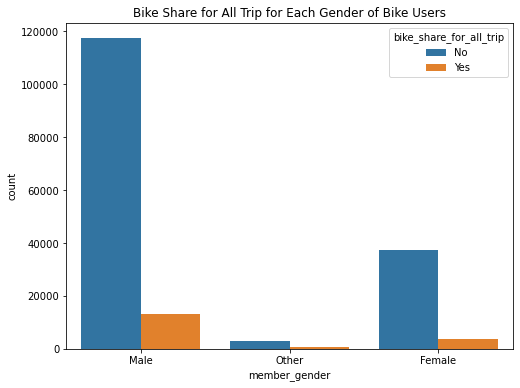

In [80]:
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.title("Bike Share for All Trip for Each Gender of Bike Users")

We can see from this plot that the majority of bike riders prefer not to share bikes for all trips, regardless of their gender.

Text(0.5, 1.0, 'Bike Share for All Trip for Each User Type')

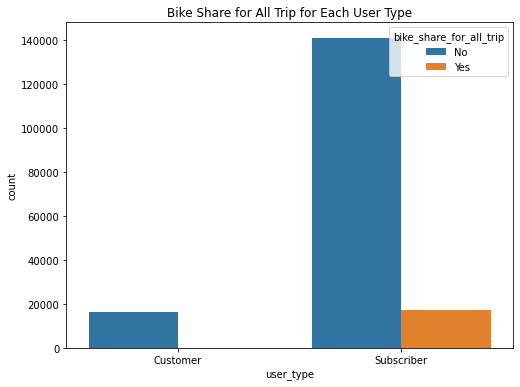

In [81]:
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip') 
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.title("Bike Share for All Trip for Each User Type")

From this plot, we can tell that some subsribers prefer to share bikes for all trips, whereas almost none of the customers prefer that.

Text(0.5, 1.0, 'User Type for Each Gender')

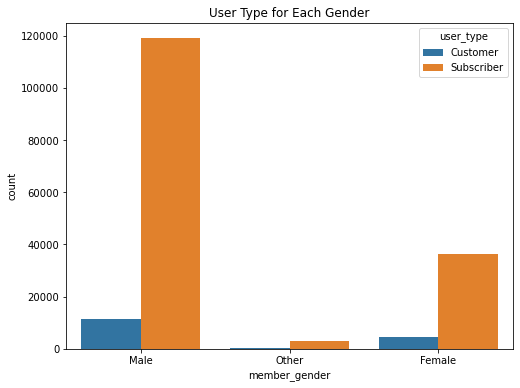

In [82]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type') 
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.title("User Type for Each Gender")

We can tell from this plot that most users are subscribers, regardless of gender.

Text(0.5, 1.0, 'User Type for All Ages of Bike Users')

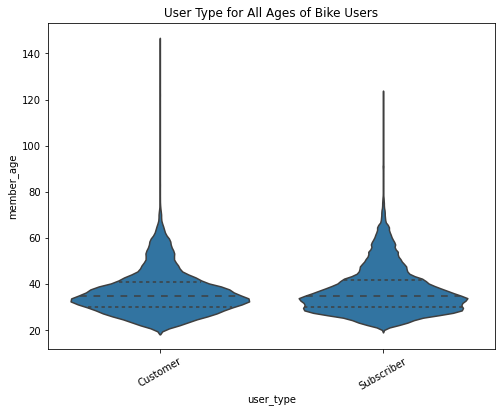

In [83]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y='member_age', color=base_color, inner='quartile')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.title("User Type for All Ages of Bike Users")

From this plot, we can see that most subscribers are in their early twenties.

Text(0.5, 1.0, 'User Gender for All Ages')

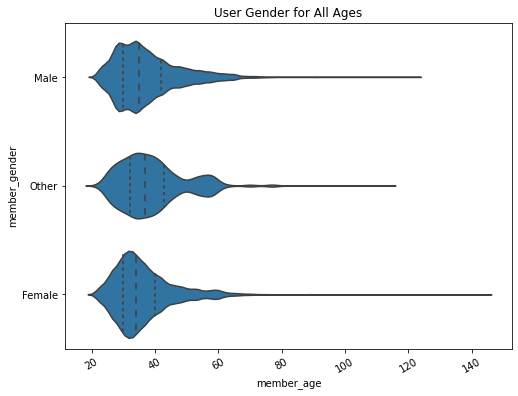

In [84]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='member_age', y='member_gender', color=base_color, inner='quartile')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.title("User Gender for All Ages")

From this plot, we can see that all genders are mostly between the 20s and 40s of age.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most relationships between features of the dataset made sense with the previous plots.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes they all were consistent.

## Multivariate Exploration


C:\Users\aalsubaie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aalsubaie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


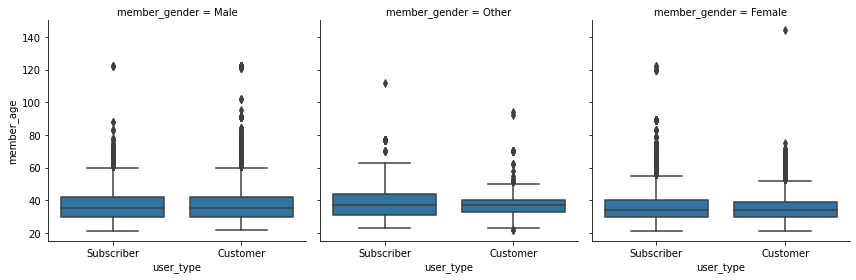

In [86]:
g = sb.FacetGrid(data = df, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'member_age')

From this plot we can tell that male and other users are mostly older than female users, whether they were subscribers or customers, with "other" customers being younger than "other" subscribers.

C:\Users\aalsubaie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


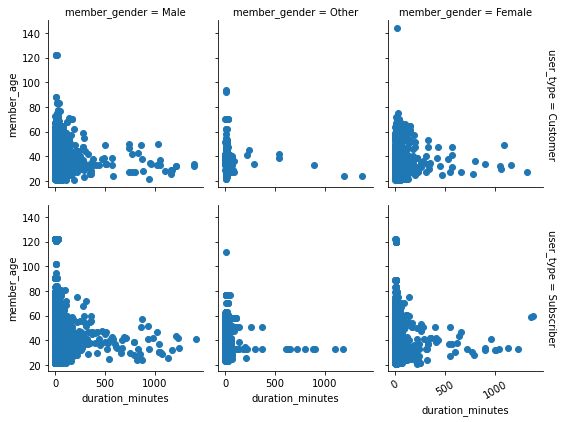

In [88]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'duration_minutes', 'member_age')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(8, 6)

From this plot we can see that male subscribers under 60 years old are most likely to ride their bikes for longer than 500 minutes than female and other bikers.

Text(0.5, 1.0, 'User Type for Gender and Age of Users')

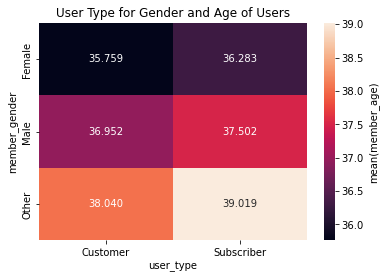

In [90]:
cat_means = df.groupby(['user_type', 'member_gender']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'member_age_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'member_age_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(member_age)'})
plt.title("User Type for Gender and Age of Users")

From this plot we can see that the average ages of customer users are younger than the subscribers, with female customers being the youngest group.

Text(0.5, 1.0, "Bike Share for All Trip for Users' Age and Type")

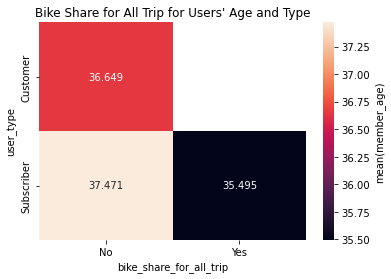

In [91]:
cat_means = df.groupby(['bike_share_for_all_trip', 'user_type']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'member_age_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'member_age_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(member_age)'})
plt.title("Bike Share for All Trip for Users' Age and Type")

From this plot we can see that the average ages bike sharers are younger than none bike sharers for both subscribers and customers.

Text(0.5, 1.0, 'Bike Share for All Trip for Users Age and Gender')

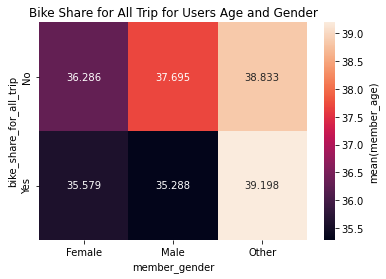

In [92]:
cat_means = df.groupby(['member_gender', 'bike_share_for_all_trip']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'member_age_avg')
cat_means = cat_means.pivot(index = 'bike_share_for_all_trip', columns = 'member_gender',
                            values = 'member_age_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(member_age)'})
plt.title("Bike Share for All Trip for Users Age and Gender")

We can see from this plot that bike sharers are generally younger than none bike sharers, with male bike sharer being the youngest group, followed closely by female bike sharers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

That ages of bike users are related to their behaviour.

### Were there any interesting or surprising interactions between features?

> That younger males are most likely to share bikes for all trips.

## Conclusions
I cleaned the data to make it clearer for the visualizations, then I made several visualizations that indecated mostly the behaviour and information of bike users. I gathered that they are mostly younger than 40, and mostly ride the bikes for less than 200 minutes, and the majority of them are subscribers to the service.